In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,NaN,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	250
float64		column 2	350
float64		column 3	100
float64		column 4	150
float64		column 5	250
float64		column 6	200
float64		column 7	200
float64		column 8	150
float64		column 9	150
float64		column 10	250
float64		column 11	100
float64		column 12	200
float64		column 13	150
float64		column 14	250
float64		column 15	150
float64		column 16	300
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19750.000000,19650.000000,19900.000000,19850.000000,19750.000000,19800.000000,19800.000000,19850.000000,19850.000000,19750.000000,19900.000000,19800.000000,19850.000000,19750.000000,19850.000000,19700.000000,0.0
mean,4.022582,7.035878,5.120754,5.372242,3.501570,6.897424,7.499091,4.625189,5.178438,8.282430,6.453166,7.926515,3.044484,8.340253,3.694207,7.801726,NaN
std,1.906811,3.292002,2.011560,2.259685,2.180584,2.019385,2.313960,2.694193,2.374886,2.481759,2.626137,2.070041,2.326879,1.539881,2.562905,1.609082,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

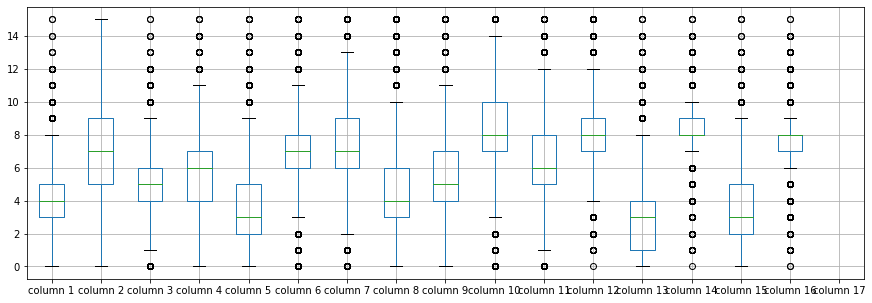

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.022582
column 2     7.035878
column 3     5.120754
column 4     5.372242
column 5     3.501570
column 6     6.897424
column 7     7.499091
column 8     4.625189
column 9     5.178438
column 10    8.282430
column 11    6.453166
column 12    7.926515
column 13    3.044484
column 14    8.340253
column 15    3.694207
column 16    7.801726
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.755303,0.850801,0.670684,0.616928,-0.033189,0.047442,0.015899,0.049853,0.147486,0.035908,-0.046945,0.488587,0.100111,0.271091,-0.105062,NaN
column 2,0.755303,1.000000,0.670062,0.822088,0.553262,0.043399,-0.040152,-0.023399,0.095672,0.159739,-0.055532,-0.006916,0.271756,-0.001525,0.228952,-0.041910,NaN
column 3,0.850801,0.670062,1.000000,0.659291,0.764708,0.059656,0.025793,-0.097064,0.055284,0.115564,0.011614,-0.044665,0.556225,0.047977,0.259797,-0.118373,NaN
column 4,0.670684,0.822088,0.659291,1.000000,0.643222,0.042416,-0.018486,0.083096,0.056645,0.013627,-0.011968,0.023702,0.264456,0.026602,0.297618,-0.019971,NaN
column 5,0.616928,0.553262,0.764708,0.643222,1.000000,0.137517,-0.029164,-0.010884,-0.066090,-0.069094,-0.072341,-0.039240,0.623468,0.018291,0.490436,-0.063941,NaN
column 6,-0.033189,0.043399,0.059656,0.042416,0.137517,1.000000,-0.355340,-0.052269,-0.124277,0.080234,-0.341484,-0.032876,0.143314,-0.252654,0.127452,0.247645,NaN
column 7,0.047442,-0.040152,0.025793,-0.018486,-0.029164,-0.355340,1.000000,-0.119357,-0.050058,0.175044,0.600393,-0.269127,-0.037182,0.552485,-0.080526,-0.204041,NaN
column 8,0.015899,-0.023399,-0.097064,0.083096,-0.010884,-0.052269,-0.119357,1.000000,-0.187661,-0.316947,0.042409,0.082483,0.143159,-0.085880,0.008764,0.181894,NaN
column 9,0.049853,0.095672,0.055284,0.056645,-0.066090,-0.124277,-0.050058,-0.187661,1.000000,0.130534,-0.059989,0.118271,-0.382557,-0.052607,0.275468,-0.059167,NaN
column 10,0.147486,0.159739,0.115564,0.013627,-0.069094,0.080234,0.175044,-0.316947,0.130534,1.000000,0.055625,-0.108748,-0.178408,0.028406,-0.088249,-0.113747,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=10)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.89382876281738
Epoch: 1 , loss: 50.90200830688477
Epoch: 2 , loss: 46.30746830444336
Epoch: 3 , loss: 44.49786937561035
Epoch: 4 , loss: 43.49262451171875
Epoch: 5 , loss: 42.55959245300293
Epoch: 6 , loss: 42.25604956970215
Epoch: 7 , loss: 42.17066716308594
Epoch: 8 , loss: 41.87027779846191
Epoch: 9 , loss: 41.72007903137207
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.738859
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,2.190094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.26865,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

186.0422988557665

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.04982631129050144

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.098069
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.00000,7.0,7.0,1.0,8.0,5.0,6.000000,-1.079211
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.00000,7.0,9.0,2.0,9.0,7.0,10.000000,-0.919793
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.00000,2.0,8.0,2.0,5.0,5.0,10.000000,-0.582053
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.00000,6.0,8.0,3.0,8.0,0.0,8.000000,-0.792657
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.00000,7.0,9.0,3.0,8.0,3.0,9.190094,-1.336247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.00000,10.0,9.0,2.0,9.0,2.0,6.000000,-1.139883
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,5.73135,6.0,8.0,1.0,9.0,6.0,8.000000,-0.536843
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.00000,7.0,6.0,3.0,9.0,3.0,7.000000,-0.085957
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.00000,0.0,7.0,0.0,8.0,0.0,8.000000,-0.575011


In [21]:
imputations[-1].to_excel("Letter_NE_1(imp).xlsx", index=False, header=False)